# Planar 2D-2D Geometry (Projective Geometry)

- Unknown : Planar homograph (8 DoF)
- Given : Point correspondence ($x_1$, $x'_1$), ..., ($x_n$, $x'_n$).
- Constraints : $n$ projection $x'_i = Hx_i$
- Solution (n $\ge$ 4) → 4-point algorithm
    - OpenCV `cv::getPerspectiveTransform()` and `cv::findHomography()`
    - More simplified transformations need less number of minimal correspondence. For instance, Affine (n $\ge$ 3), similarity (n $\ge$ 2), Euclidean (n $\ge$ 2)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Perspective Distortion Correction

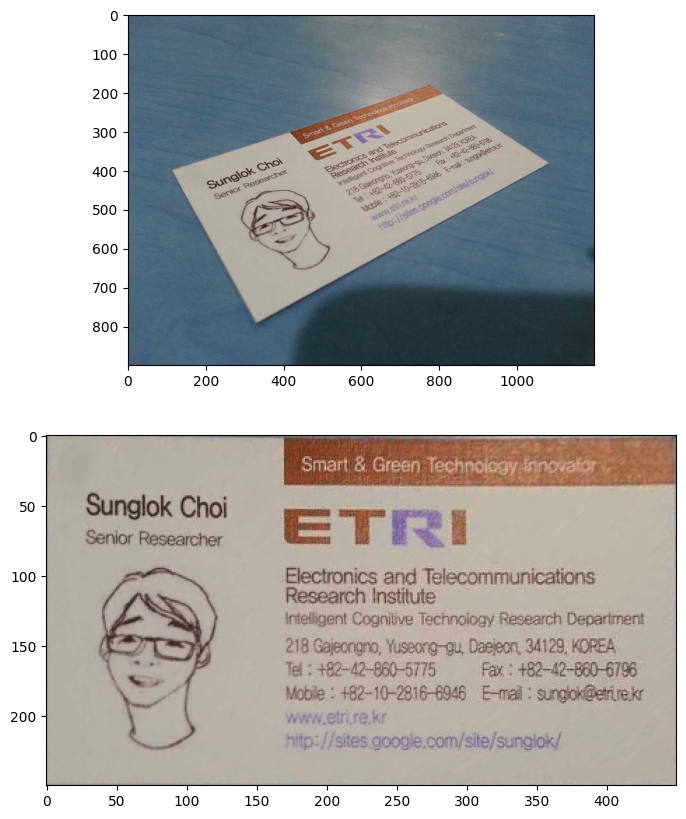

In [ ]:
input = 'sunglok_desk.jpg'
image = cv2.imread(input)
card_size = np.array([450, 250])

# Prepare the rectified points
points_dst = np.zeros((4, 2), np.float32)
points_dst[0] = np.array([0, 0])
points_dst[1] = np.array([card_size[0], 0])
points_dst[2] = np.array([card_size[0], card_size[1]])
points_dst[3] = np.array([0, card_size[1]])

# Prepare the image points (manually selected)
points_src = np.zeros((4, 2), np.float32)
points_src[0] = np.array([113, 401])
points_src[1] = np.array([775, 178])
points_src[2] = np.array([1078, 382])
points_src[3] = np.array([332, 791])

H, _ = cv2.findHomography(points_src, points_dst);
image_rect = cv2.warpPerspective(image, H, card_size)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].imshow(image)
ax[1].imshow(image_rect)
plt.show()

## Planar Images Stitching

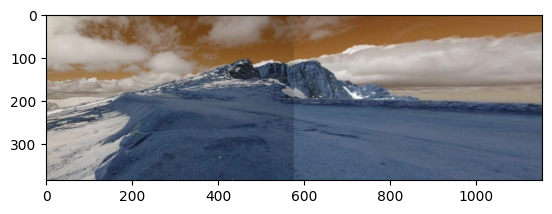

In [21]:
# Load two images (we assume the two images have the same size and type)
image_name = ['hill01.jpg', 'hill02.jpg']
image1 = cv2.imread(image_name[0])
image2 = cv2.imread(image_name[1])

# Retrieve matching points
detector = cv2.ORB_create()
key1, desc1 = detector.detectAndCompute(image1, None)
key2, desc2 = detector.detectAndCompute(image2, None)

# Match keypoint descriptors
matcher = cv2.DescriptorMatcher_create('BruteForce-Hamming')
matches = matcher.match(desc1, desc2)

# Retrieve matching keypoints
points1, points2 = zip(*([(key1[m.queryIdx].pt, key2[m.trainIdx].pt) for m in matches]))
points1 = np.array(points1, dtype=np.float32)
points2 = np.array(points2, dtype=np.float32)

# Estimate homography and warp image.
H, _ = cv2.findHomography(points2, points1, cv2.RANSAC);
merged = cv2.warpPerspective(image2, H, (image1.shape[1]*2, image1.shape[0]))
merged[:,:image1.shape[1]] = image1

plt.imshow(merged)
plt.show()

## Video Stabilization

## Appendix

In [23]:
a, b=zip(*([(i, 2*i) for i in range(5)]))
a, b

((0, 1, 2, 3, 4), (0, 2, 4, 6, 8))